In [49]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import inspect
import seaborn as sns
import scipy

import statsmodels.formula.api as smf

In [3]:
data=pd.read_csv('D:/2025 coding/datasets/chicago_taxi_train.csv')

In [4]:
data.sort_values(by='FARE',inplace=True)

In [5]:
data.isna().sum()

TRIP_START_TIMESTAMP          0
TRIP_END_TIMESTAMP            0
TRIP_START_HOUR               0
TRIP_SECONDS                  0
TRIP_MILES                    0
TRIP_SPEED                    0
PICKUP_CENSUS_TRACT       18435
DROPOFF_CENSUS_TRACT      17671
PICKUP_COMMUNITY_AREA      3217
DROPOFF_COMMUNITY_AREA     3495
FARE                          0
TIPS                          0
TIP_RATE                      0
TOLLS                         0
EXTRAS                        0
TRIP_TOTAL                    0
PAYMENT_TYPE                  0
COMPANY                       0
dtype: int64

In [6]:
data.drop(['PICKUP_CENSUS_TRACT','DROPOFF_CENSUS_TRACT','PICKUP_COMMUNITY_AREA','DROPOFF_COMMUNITY_AREA'],axis=1,inplace=True)

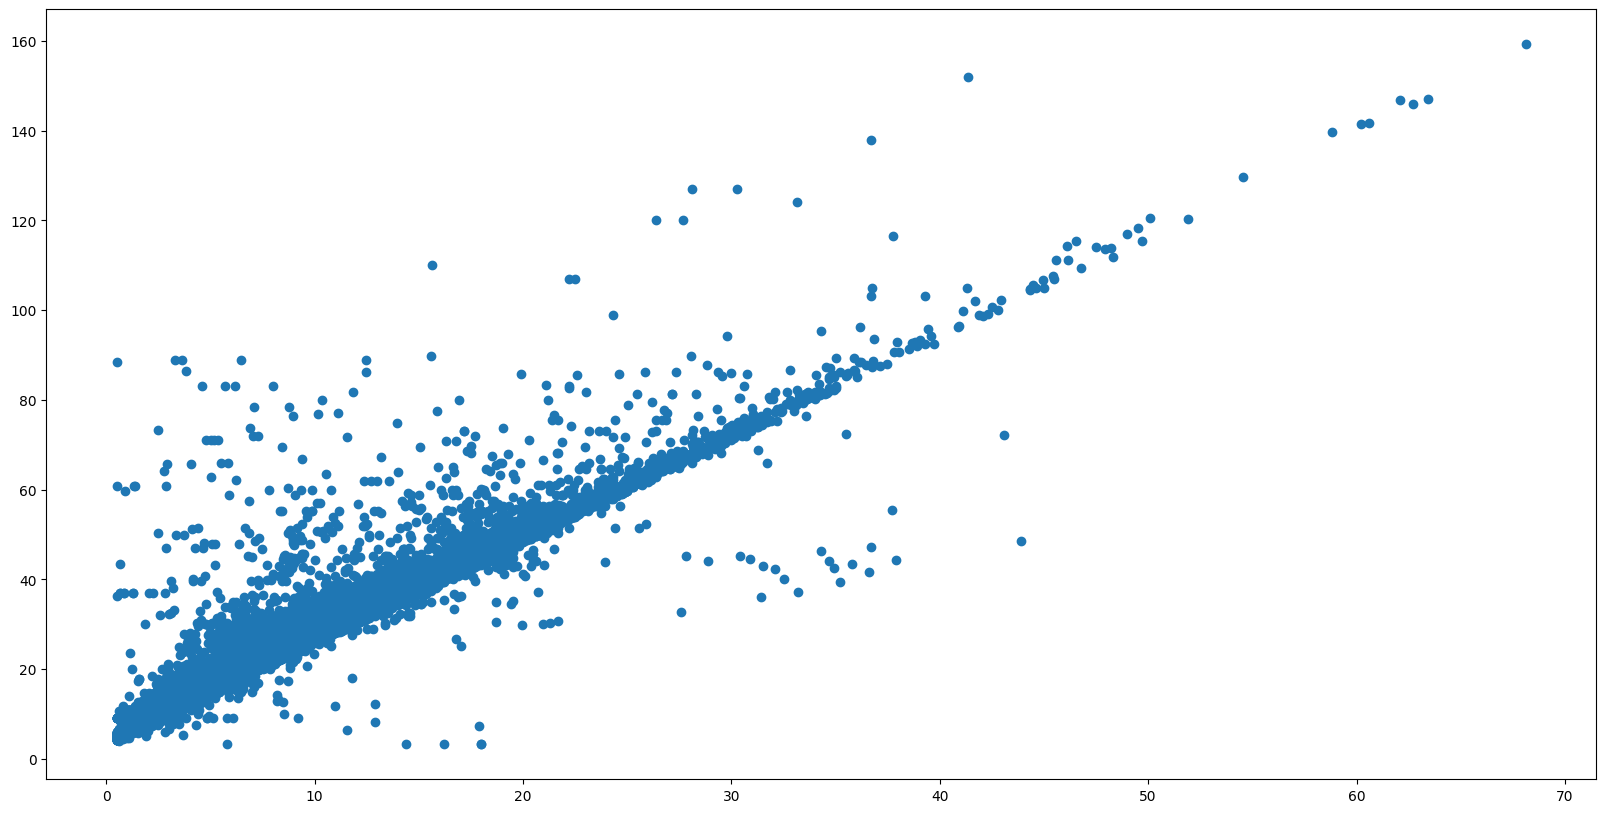

In [7]:
plt.figure(figsize=(20, 10))  
plt.scatter(data['TRIP_MILES'],data['FARE'],marker='o')

plt.show()


In [8]:
data[data['TRIP_MILES']<5][['TRIP_MILES','FARE']]

,TRIP_MILES,FARE
16226,0.60,4.00
13458,0.50,4.25
13471,0.50,4.25
18506,0.50,4.25
25354,0.50,4.25
...,...,...
3667,4.60,83.00
25007,3.83,86.45
424,0.51,88.53
9962,3.28,89.00


There are certain base cases and other factor which affects the below result but while assuming if there's no external factor which affect the relationship btw the miles tavelled and the fare the result of the function is very close to the desired result

In [9]:
def fare_finder(miles: float):
    if miles<0.6:
        return 4.50
    
    slope,intercept=np.polyfit(data['TRIP_MILES'],data['FARE'],1)
    return round(slope*miles+intercept,2)

print(fare_finder(68))


159.93


In [10]:
data.describe()

,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
count,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000
mean,14.185635,1319.796397,8.289463,20.256544,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053
std,5.159454,928.932873,7.265672,11.110390,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537
min,0.000000,60.000000,0.500000,4.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000
25%,10.500000,548.000000,1.720000,11.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000
50%,14.750000,1081.000000,5.920000,17.600000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000
75%,18.000000,1888.000000,14.500000,27.500000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000
max,23.750000,7140.000000,68.120000,64.800000,159.250000,60.000000,648.600000,27.000000,85.000000,248.500000


In [11]:
np.percentile(data['FARE'],75)

np.float64(38.75)

Standard Deviation:
        to measure the uncertainty of the data

In [12]:
np.std(data[['TRIP_MILES','FARE']])

c:\Users\dilip\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


TRIP_MILES     7.265557
FARE          16.969754
dtype: float64

Coefficient of variance 
is to get an idea of how large the standard deviation is.
Coefficient of Variation = Standard Deviation / Mean

In [13]:
round(np.std(data['TRIP_MILES'])/np.mean(data['TRIP_MILES']),2)

np.float64(0.88)

variance : Square of std

In [14]:
np.var(data['TRIP_MILES'])

np.float64(52.78832200256653)

correlation : -1 0 1

In [20]:
data[['TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'FARE', 'TIPS', 'TIP_RATE']].corr()

,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,FARE,TIPS,TIP_RATE
TRIP_SECONDS,1.000000,0.800855,0.301209,0.830292,0.433930,-0.084294
TRIP_MILES,0.800855,1.000000,0.748004,0.975344,0.575374,-0.049594
TRIP_SPEED,0.301209,0.748004,1.000000,0.695734,0.421333,-0.057886
FARE,0.830292,0.975344,0.695734,1.000000,0.544654,-0.070979
TIPS,0.433930,0.575374,0.421333,0.544654,1.000000,0.550059
TIP_RATE,-0.084294,-0.049594,-0.057886,-0.070979,0.550059,1.000000


In [28]:
data

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
4931,05/17/2022 1:00:00 PM,05/17/2022 2:30:00 PM,13.00,5460,14.40,9.5,3.25,0.00,0.0,0.00,0.0,3.25,Dispute,Top Cab Affiliation
22115,05/17/2022 1:00:00 AM,05/17/2022 1:45:00 AM,1.00,2580,18.00,25.1,3.25,0.00,0.0,1.98,1.0,6.23,Cash,Top Cab Affiliation
22117,05/16/2022 3:00:00 PM,05/16/2022 3:45:00 PM,15.00,2580,18.00,25.1,3.25,2.50,4.9,0.00,47.5,53.25,Credit Card,Choice Taxi Association
15354,05/16/2022 8:45:00 AM,05/16/2022 9:30:00 AM,8.75,3420,16.20,17.1,3.25,0.00,0.0,0.00,0.0,3.25,Cash,Top Cab Affiliation
14249,05/17/2022 12:15:00 PM,05/17/2022 12:45:00 PM,12.25,1320,5.80,15.8,3.25,4.00,106.7,0.00,0.5,7.75,Credit Card,Choice Taxi Association
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30719,05/17/2022 2:45:00 PM,05/17/2022 4:00:00 PM,14.75,5017,62.72,45.0,146.00,20.00,8.8,0.00,81.5,248.50,Credit Card,Medallion Leasin
30228,05/16/2022 11:15:00 AM,05/16/2022 12:30:00 PM,11.25,5282,62.08,42.3,146.75,0.00,0.0,0.00,41.0,187.75,Cash,Flash Cab
31469,05/17/2022 9:15:00 PM,05/17/2022 10:30:00 PM,21.25,4362,63.41,52.3,147.00,0.00,0.0,0.00,0.0,147.00,Cash,City Service
31116,05/16/2022 9:15:00 AM,05/16/2022 10:00:00 AM,9.25,3098,41.33,48.0,152.00,24.15,15.0,0.00,8.5,185.15,Credit Card,Flash Cab


Now let's try predicting the fare with trip seconds using linear regression

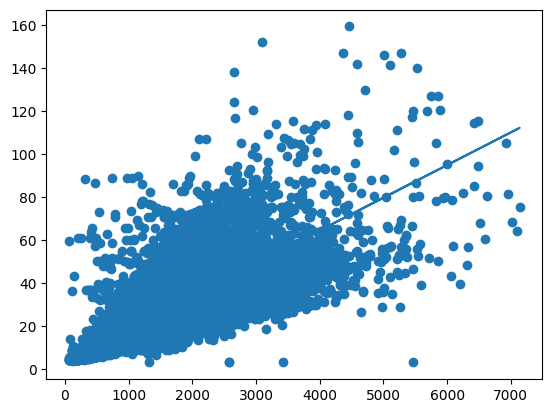

In [42]:
slope,intercept,r,p,std=scipy.stats.linregress(data['TRIP_SECONDS'],data['FARE'])

def PredictFare(seconds):
    return slope*seconds+intercept

x=data['TRIP_SECONDS']
y=data['FARE']

mymodel=list(map(PredictFare,x))

plt.scatter(x,y)
plt.plot(x,mymodel)



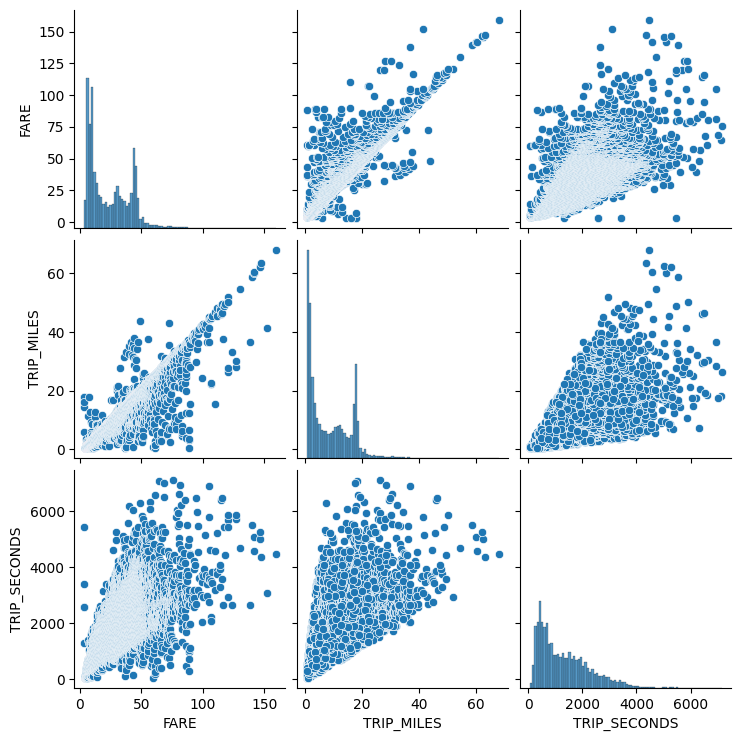

In [ ]:
sns.pairplot(data,x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"]);

In [52]:
df=data

In [56]:
model=smf.ols('TRIP_SECONDS~TRIP_MILES',data=data[['TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'FARE', 'TIPS', 'TIP_RATE']])

In [57]:
result=model.fit()

In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TRIP_SECONDS   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                 5.668e+04
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:47:55   Log-Likelihood:            -2.4532e+05
No. Observations:               31694   AIC:                         4.906e+05
Df Residuals:                   31692   BIC:                         4.907e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    471.0284      4.741     99.356      0.000     461.736     480.321
TRIP_MILES   102.3912      0.430    238.070      0.000     101.548     103.234
==============================================================================
Omnibus:                    10501.675   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53422.311
Skew:                           1.522   Prob(JB):                         0.00
Kurtosis:                       8.584   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""